In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
train_df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
test_df.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [5]:
print('Train Data shape: ', train_df.shape)
print('Test Data shape: ', test_df.shape)

Train Data shape:  (43152, 11)
Test Data shape:  (10788, 10)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
train_df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
train_df.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
train_df.duplicated().sum()

0

In [10]:
train_df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

## Id 

In [11]:
#We do not need the Id column as it will not give us any value, so I am going to drop it
train_df.drop('Id', axis=1, inplace=True)

In [12]:
#Let's see the data after dropping the Id column
train_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


## carat

**Carat refers to the weight of the diamond, which is an important factor in determining its price.**

In [13]:
# Let's see the describtion 
carat_stats = train_df['carat'].describe()
print("Carat Statistics:")
print(carat_stats)

Carat Statistics:
count    43152.000000
mean         0.797855
std          0.473594
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64


In [14]:
carat_counts = train_df['carat'].value_counts().sum()
carat_counts

43152

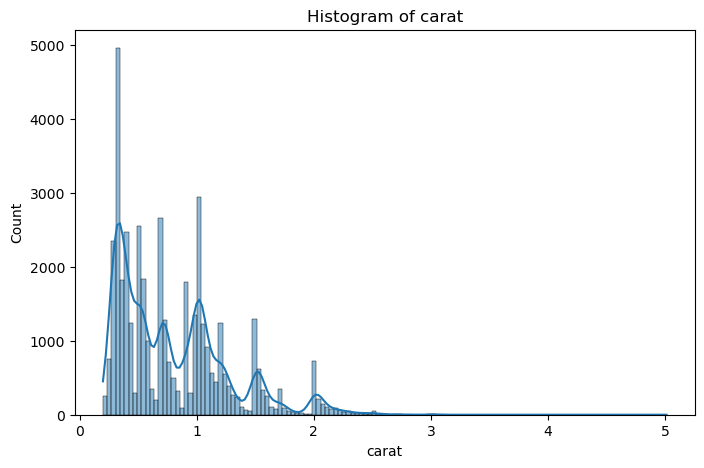

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='carat', kde=True)
plt.title(f"Histogram of {'carat'}")
plt.show()

## cut

**Cut refers to the quality of how the diamond is cut, affecting its brilliance and overall appearance.**

In [16]:
# Let's see the describtion 
cut_stats = train_df['cut'].describe()
print("Cut Statistics:")
print(cut_stats)

Cut Statistics:
count     43152
unique        5
top       Ideal
freq      17203
Name: cut, dtype: object


In [17]:

cut_counts = train_df['cut'].value_counts()
print("\nCut Counts:")
print(cut_counts)


Cut Counts:
cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64


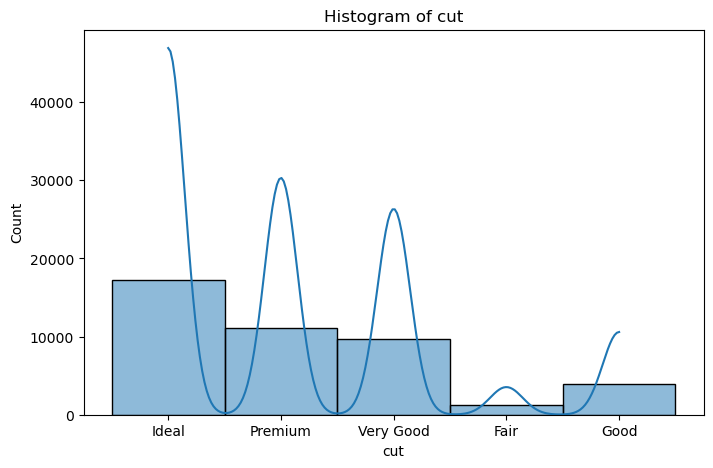

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='cut', kde=True)
plt.title(f"Histogram of {'cut'}")
plt.show()

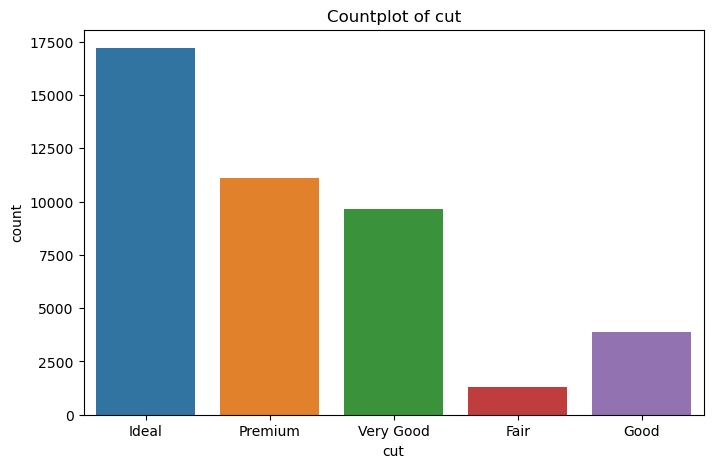

In [19]:

plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='cut')
plt.title(f"Countplot of {'cut'}")
plt.show()

## color

**Color represents the diamond's color grade, ranging from D (colorless) to Z (light yellow or brown).**

In [20]:
# Let's see the describtion 
color_stats = train_df['color'].describe()
print("Color Statistics:")
print(color_stats)

Color Statistics:
count     43152
unique        7
top           G
freq       9060
Name: color, dtype: object


In [21]:
color_counts = train_df['color'].value_counts()
print("\nColor Counts:")
print(color_counts)


Color Counts:
color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64


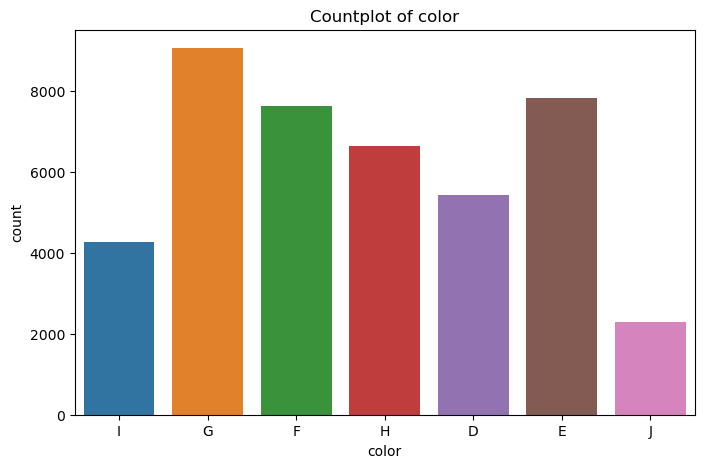

In [22]:

plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='color')
plt.title(f"Countplot of {'color'}")
plt.show()


## clarity

**Clarity refers to the presence of internal or external flaws in the diamond. It is usually graded on a scale from IF (internally flawless) to I3 (included).**

In [23]:
# Let's see the describtion 
clarity_stats = train_df['clarity'].describe()
print("Clarity Statistics:")
print(clarity_stats)

Clarity Statistics:
count     43152
unique        8
top         SI1
freq      10428
Name: clarity, dtype: object


In [24]:
clarity_counts = train_df['clarity'].value_counts()
print("\nClarity Counts:")
print(clarity_counts)


Clarity Counts:
clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64


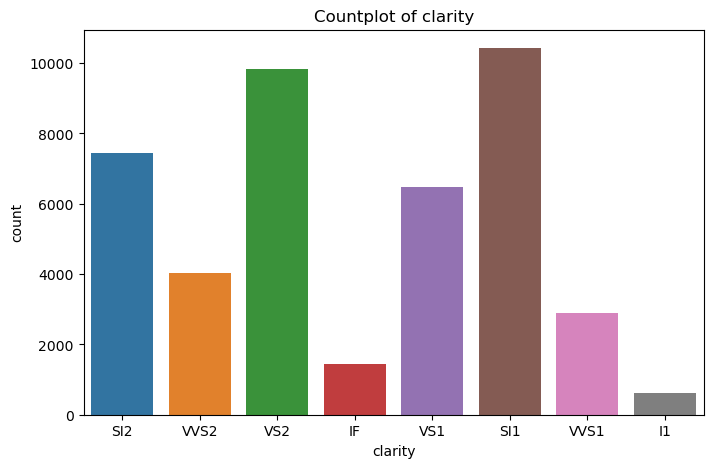

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='clarity')
plt.title(f"Countplot of {'clarity'}")
plt.show()

## depth

**Depth represents the height of a diamond as a percentage of its diameter.**

In [26]:
# Let's see the describtion 
depth_stats = train_df['depth'].describe()
print("depth Statistics:")
print(depth_stats)

depth Statistics:
count    43152.000000
mean        61.747177
std          1.435454
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64


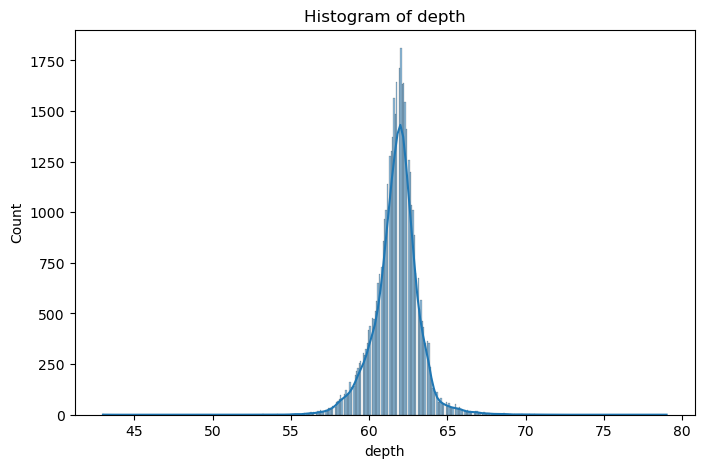

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='depth', kde=True)
plt.title(f"Histogram of {'depth'}")
plt.show()

## table

**Table refers to the width of the diamond's top facet as a percentage of its diameter.**

In [28]:
# Let's see the describtion 
table_stats = train_df['table'].describe()
print("Table Statistics:")
print(table_stats)

Table Statistics:
count    43152.000000
mean        57.458347
std          2.233904
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64


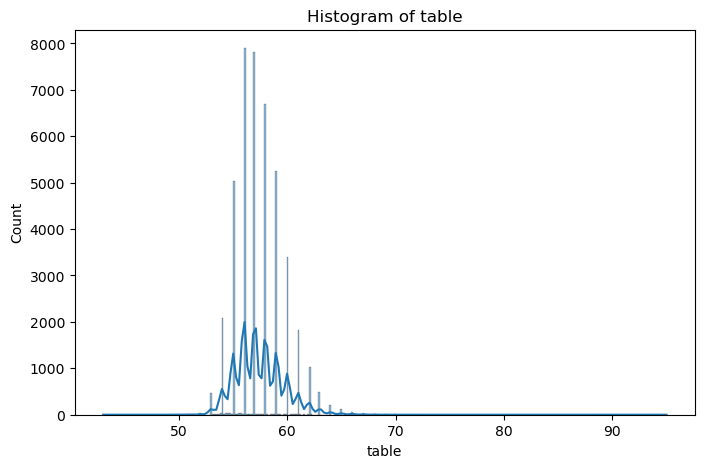

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='table', kde=True)
plt.title(f"Histogram of {'table'}")
plt.show()

## price

**This column contains the target variable, i.e., the price of the diamond.**

In [30]:
# Let's see the describtion 
price_stats = train_df['price'].describe()
print("Price Statistics:")
print(price_stats)

Price Statistics:
count    43152.000000
mean      3929.491912
std       3985.527795
min        326.000000
25%        947.750000
50%       2401.000000
75%       5312.000000
max      18823.000000
Name: price, dtype: float64


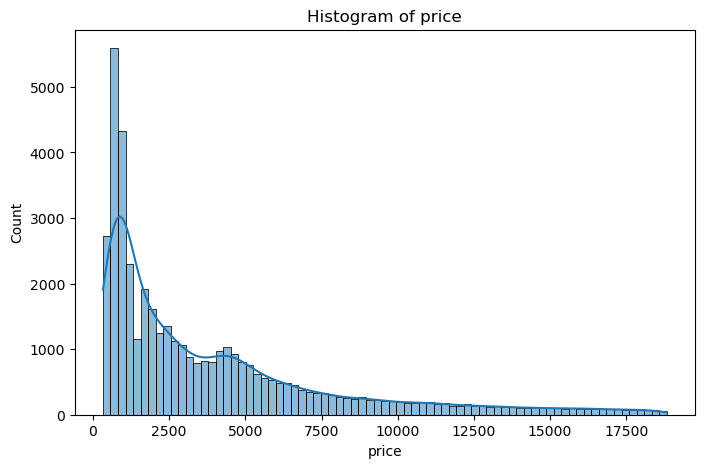

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='price', kde=True)
plt.title(f"Histogram of {'price'}")
plt.show()

## x

**This column represent the dimensions of the diamond in length.**

In [32]:
# Let's see the describtion 
x_stats = train_df['x'].describe()
print("X Statistics:")
print(x_stats)
#we can notice that the min is 0

X Statistics:
count    43152.000000
mean         5.731568
std          1.121279
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64


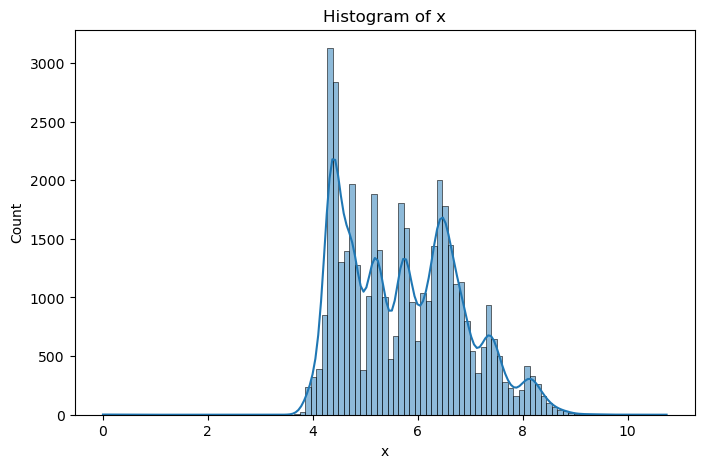

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='x', kde=True)
plt.title(f"Histogram of {'x'}")
plt.show()

## y

**This column represent the dimensions of the diamond in width.**

In [34]:
# Let's see the describtion 
y_stats = train_df['y'].describe()
print("Y Statistics:")
print(y_stats)
#we can notice that the min is 0

Y Statistics:
count    43152.000000
mean         5.735018
std          1.148809
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64


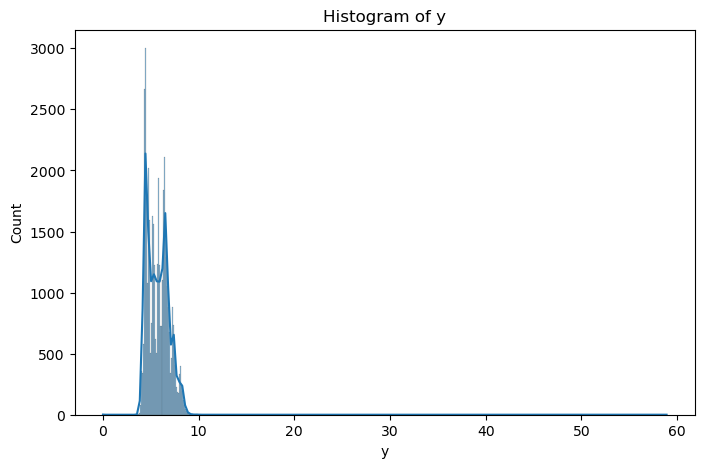

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='y', kde=True)
plt.title(f"Histogram of {'y'}")
plt.show()

## z

**This column represent the dimensions of the diamond in depth.** 

In [36]:
# Let's see the describtion 
z_stats = train_df['z'].describe()
print("z Statistics:")
print(z_stats)
#we can notice that the min is 0

z Statistics:
count    43152.000000
mean         3.538568
std          0.708238
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: z, dtype: float64


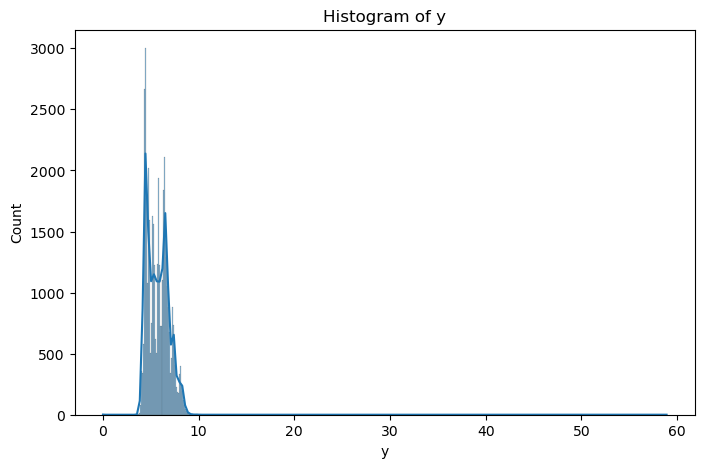

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='y', kde=True)
plt.title(f"Histogram of {'y'}")
plt.show()

### Dealing with the 0 values in x, y, z

In [38]:
train_df = train_df[(train_df['x'] != 0) & (train_df['y'] != 0) & (train_df['z'] != 0)]

In [39]:
train_df.describe()

,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,0.797578,61.747386,57.457925,3927.668691,5.731757,5.735070,3.539962
std,0.473325,1.435091,2.233401,3983.324154,1.119336,1.147272,0.704884
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Visualization

C:\Users\habob\anaconda3\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


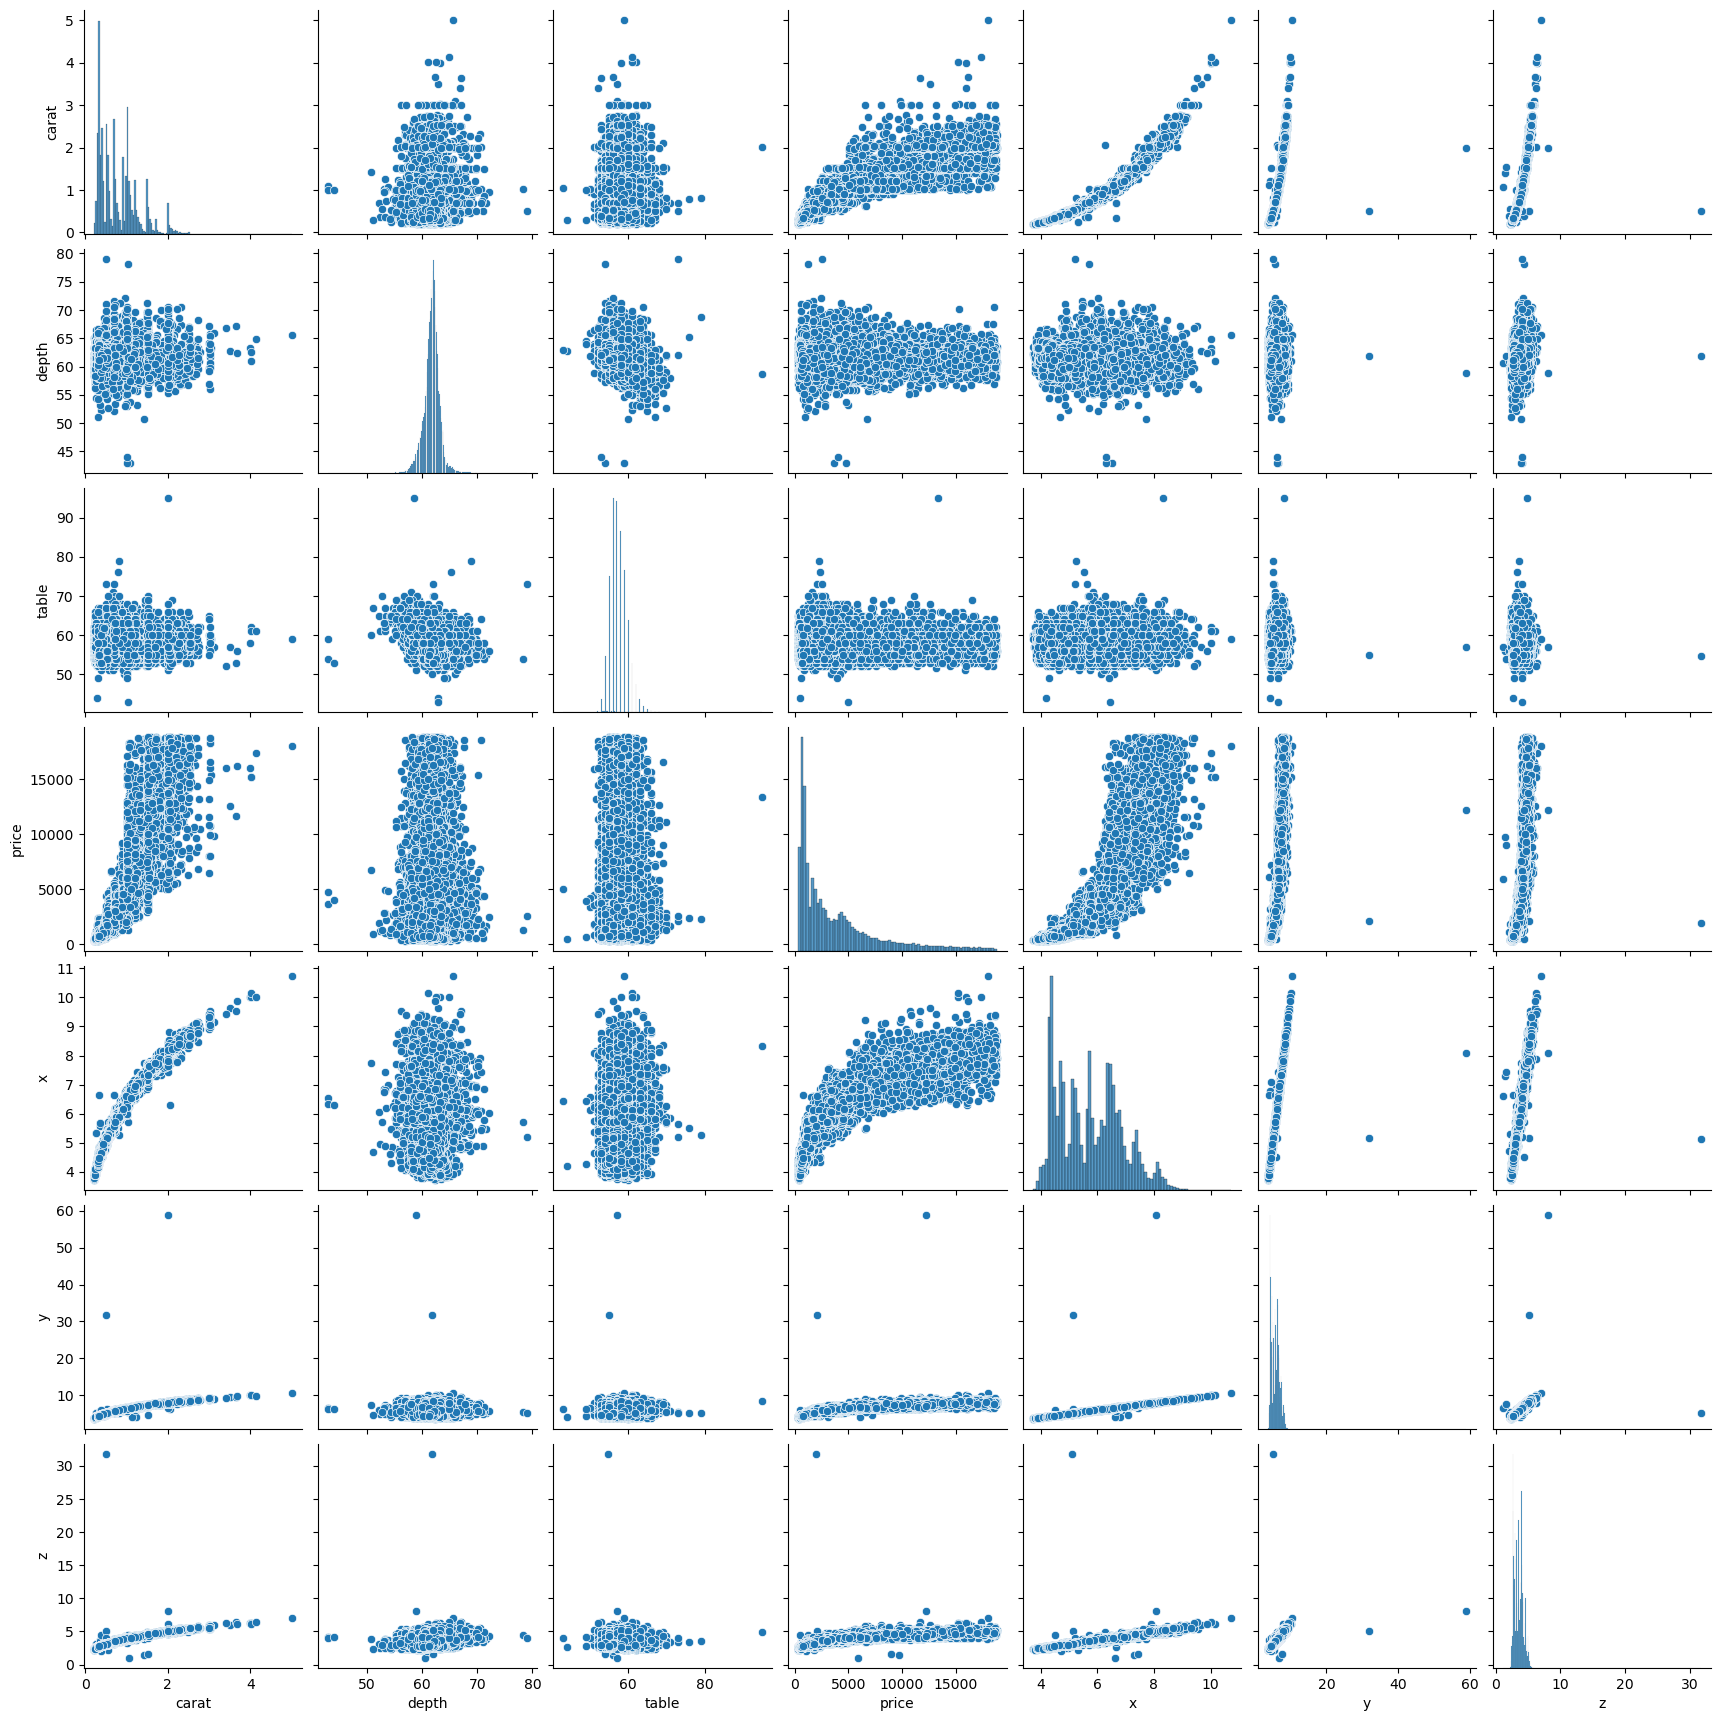

In [40]:
sns.pairplot(train_df)

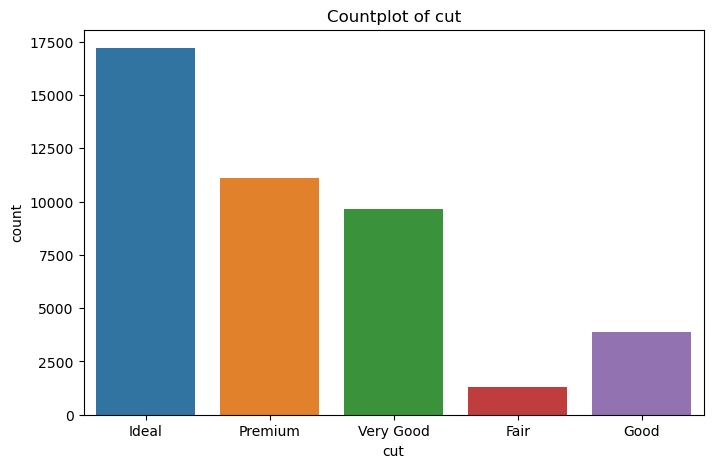

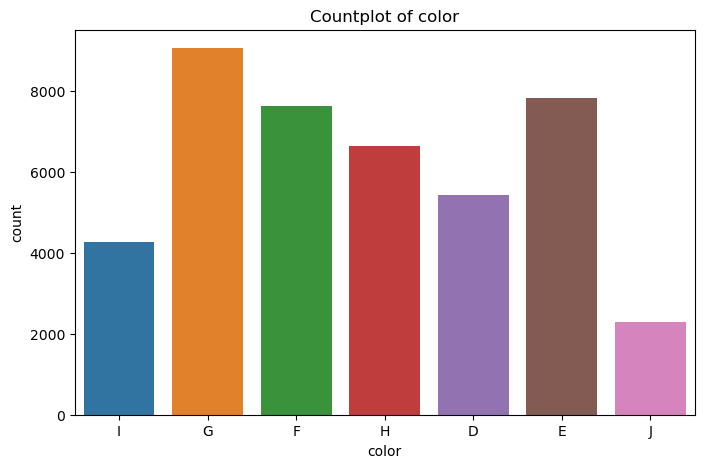

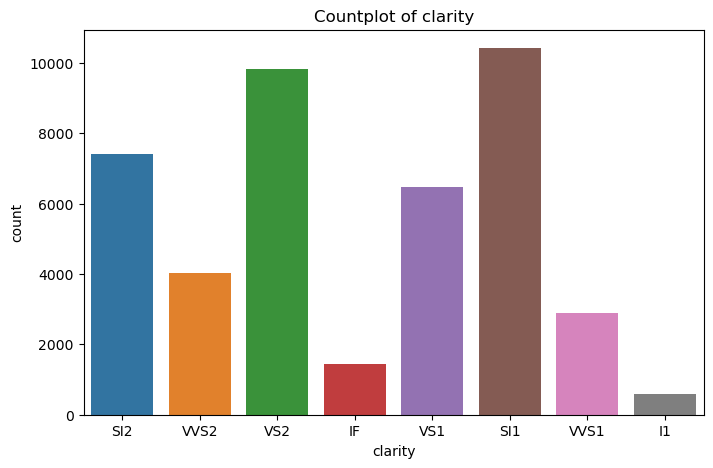

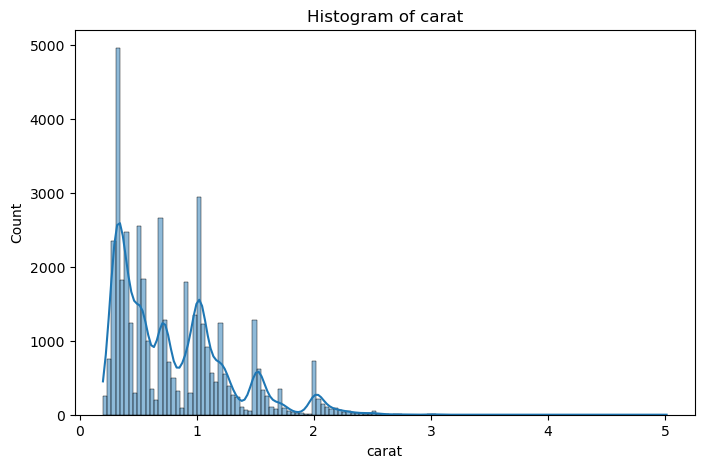

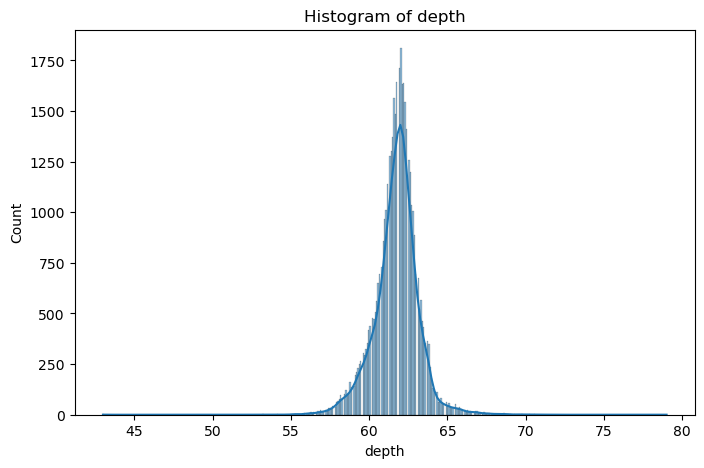

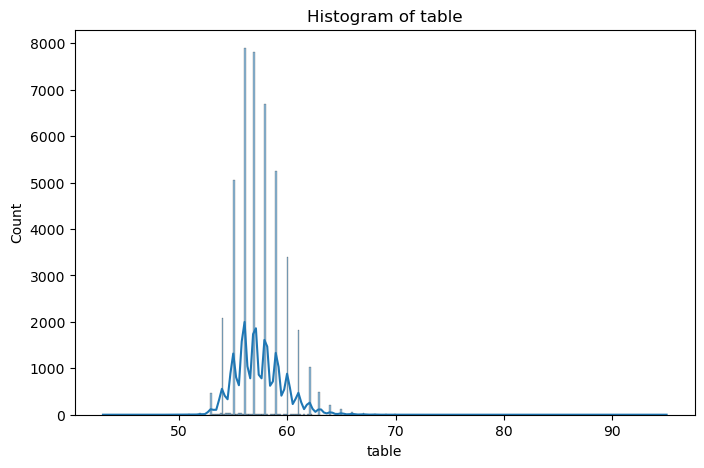

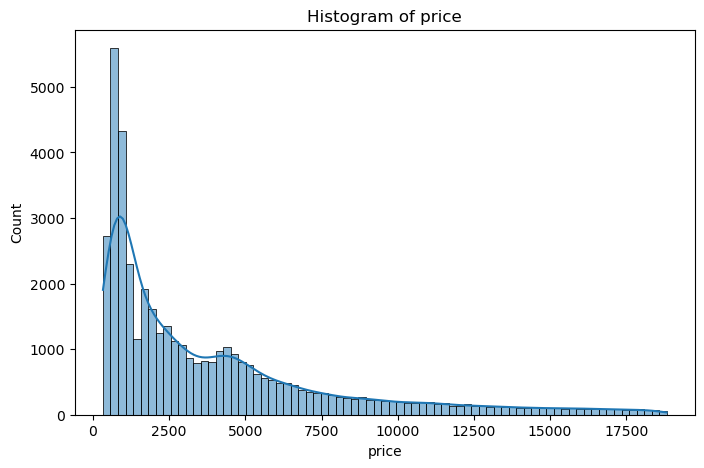

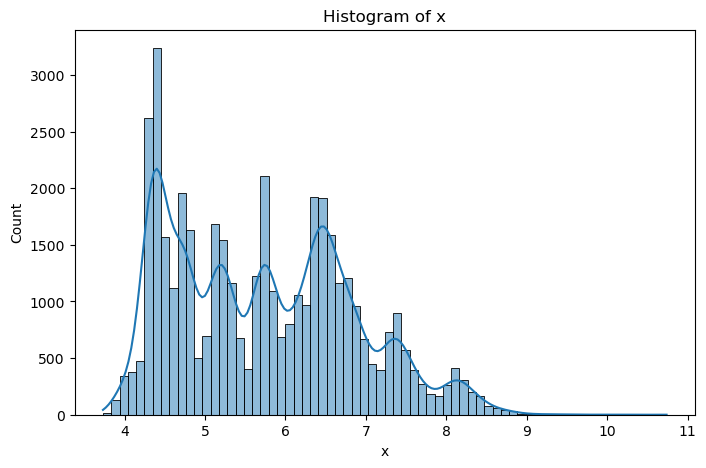

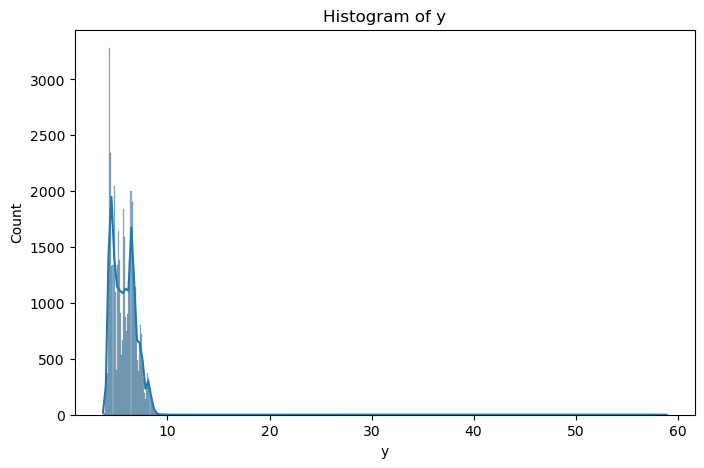

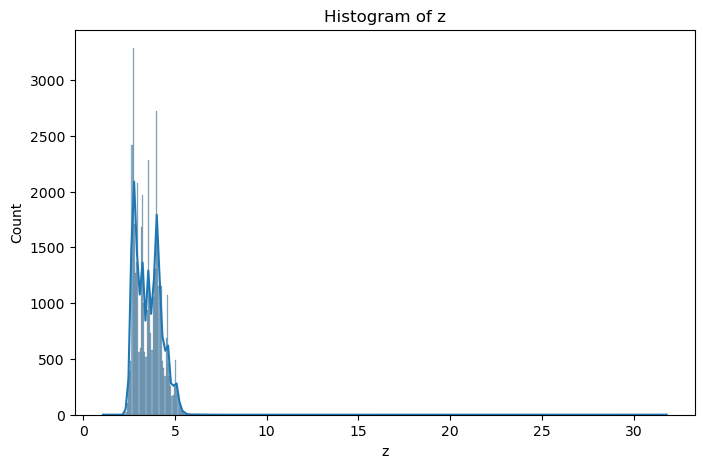

In [41]:
# Select columns for visualization
columns_to_visualize = ['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Plot categorical columns
for column in ['cut', 'color', 'clarity']:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_df, x=column)
    plt.title(f"Countplot of {column}")
    plt.show()

# Plot numerical columns
for column in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=train_df, x=column, kde=True)
    plt.title(f"Histogram of {column}")
    plt.show()

## Checking for outliers

Number of outliers in carat: 1498


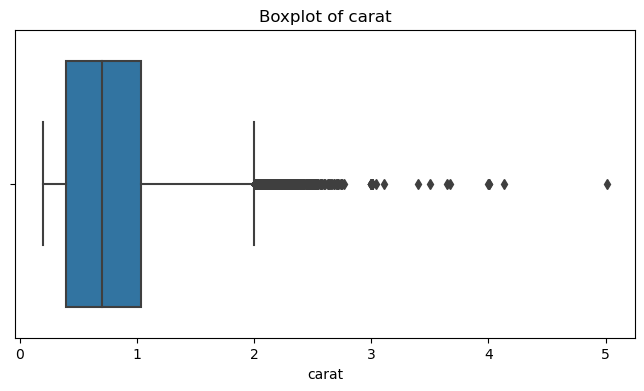

Number of outliers in depth: 2054


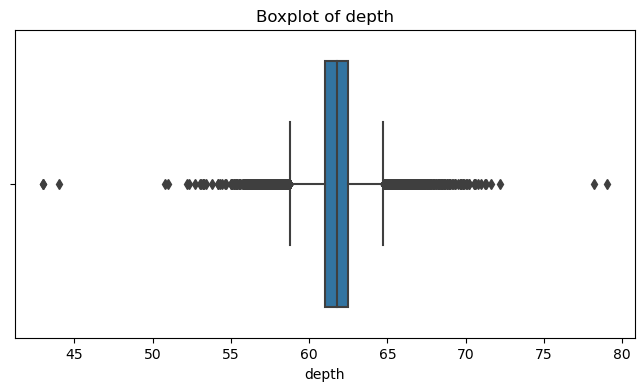

Number of outliers in table: 471


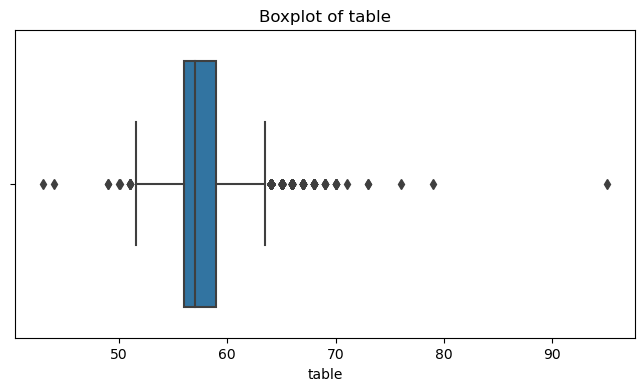

Number of outliers in price: 2838


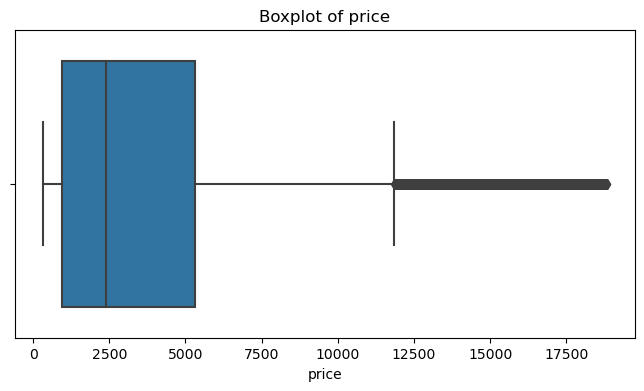

Number of outliers in x: 16


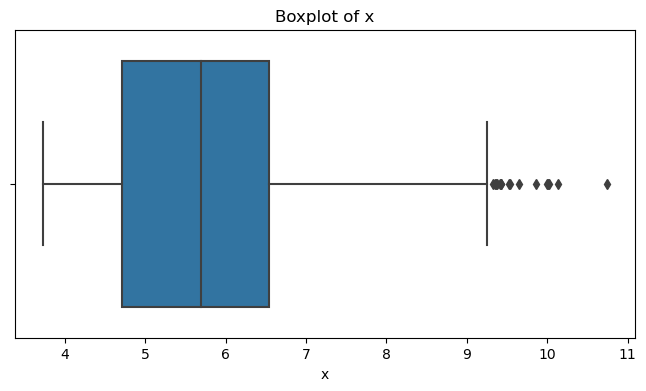

Number of outliers in y: 15


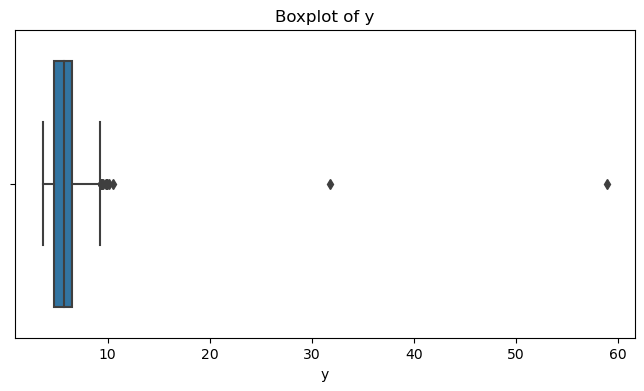

Number of outliers in z: 22


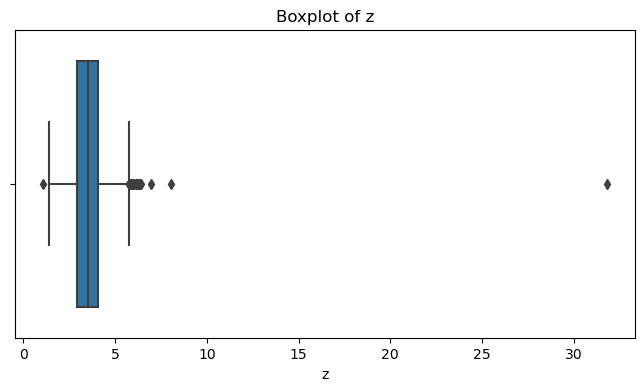

In [42]:
# Define a list of columns to check for outliers
columns_to_check = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Detect and visualize outliers for each column
for column in columns_to_check:
    # Calculate the interquartile range (IQR)
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier threshold
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = train_df[(train_df[column] < lower_threshold) | (train_df[column] > upper_threshold)]

    # Print the number of outliers
    print(f"Number of outliers in {column}: {len(outliers)}")

    # Create a boxplot to visualize the distribution and outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [43]:
train_df=train_df[(train_df["depth"]<75)&(train_df["depth"]>45)]
train_df=train_df[(train_df["table"]<80)&(train_df["table"]>50)]
train_df=train_df[(train_df["x"]<10)]
train_df=train_df[(train_df["y"])<30]
train_df=train_df[(train_df["z"]<30)&(train_df["z"]>2)]
train_df.shape

(43113, 10)

## Dealing with outliers

In [44]:
# import pandas as pd


# # Define a list of columns to check for outliers
# columns_to_check = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# # Remove outliers for each column
# for column in columns_to_check:
#     # Calculate the interquartile range (IQR)
#     Q1 = train_df[column].quantile(0.25)
#     Q3 = train_df[column].quantile(0.75)
#     IQR = Q3 - Q1

#     # Define the outlier threshold
#     lower_threshold = Q1 - 1.5 * IQR
#     upper_threshold = Q3 + 1.5 * IQR

#     # Remove outliers
#     train_df = train_df[(train_df[column] >= lower_threshold) & (train_df[column] <= upper_threshold)]

# # Verify the updated DataFrame
# print(train_df.head())

**Let's check the columns after deleting the outliers**

Number of outliers in carat: 1492


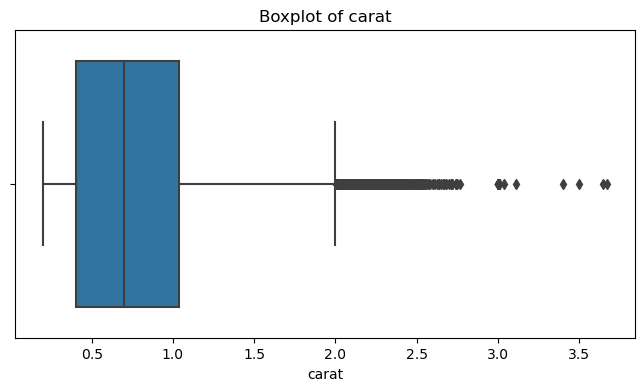

Number of outliers in depth: 2046


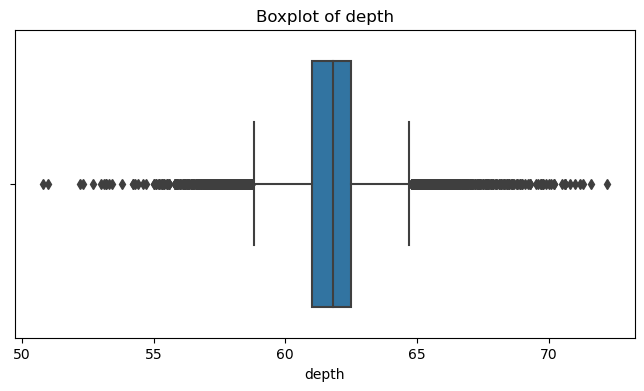

Number of outliers in table: 464


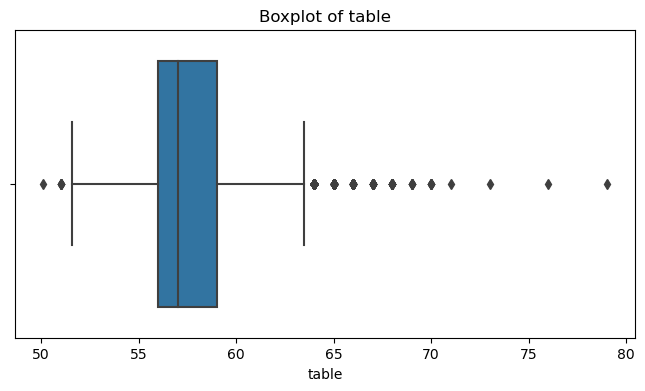

Number of outliers in price: 2838


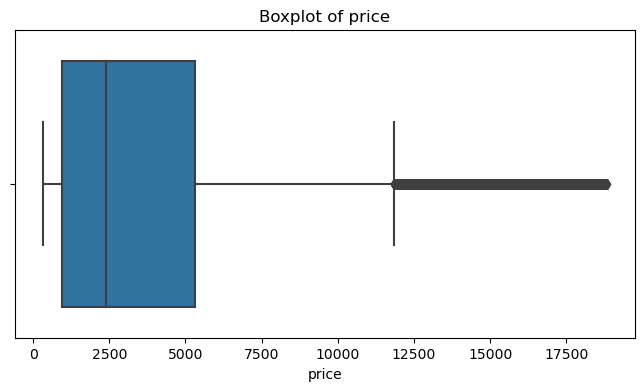

Number of outliers in x: 11


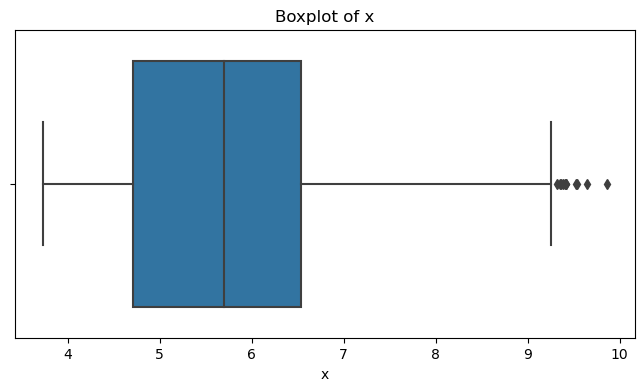

Number of outliers in y: 8


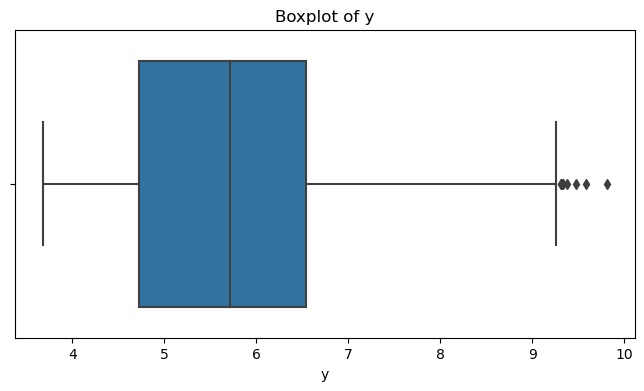

Number of outliers in z: 14


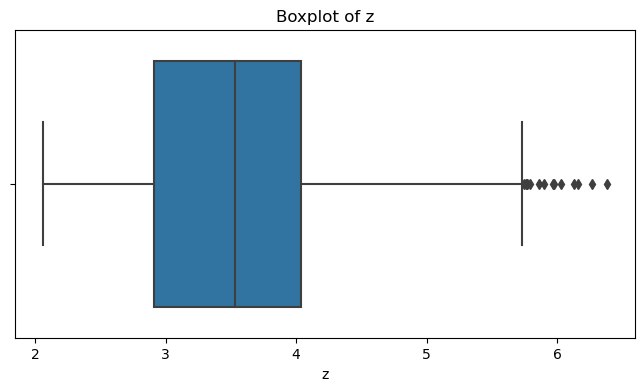

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define a list of columns to check for outliers
columns_to_check = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Detect and visualize outliers for each column
for column in columns_to_check:
    # Calculate the interquartile range (IQR)
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier threshold
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = train_df[(train_df[column] < lower_threshold) | (train_df[column] > upper_threshold)]

    # Print the number of outliers
    print(f"Number of outliers in {column}: {len(outliers)}")

    # Create a boxplot to visualize the distribution and outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

**As we can notice from the box plots, the outliers are deleted.**

In [46]:
# train_df=train_df.drop(['cut','color','clarity'],axis=1)
# test_df=test_df.drop(['cut','color','clarity'],axis=1)

## Categorical columns

In [47]:
# Identify categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

# Print the categorical columns
print("Categorical Columns:")
print(categorical_columns)
#As we can see we have three categorical columns

Categorical Columns:
Index(['cut', 'color', 'clarity'], dtype='object')


## Dealing with Categorical columns

In [48]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = ['cut', 'color', 'clarity']


column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder='passthrough',
    verbose_feature_names_out=False,
)

### Scaler

In [49]:
scaler = MinMaxScaler().set_output(transform="pandas")

## Splitting the data to X and y

In [50]:
X = train_df.drop(columns=["price"])
y = train_df.price

In [51]:
#Let's see X
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,5.76,5.72,3.50


In [52]:
#Let's see the shape of X
X.shape

(43113, 9)

In [53]:
#Let's see y
y.head()

0     4270
1    15164
2      828
3     1577
4     2596
Name: price, dtype: int64

In [54]:
#Let's see the shape of y
y.shape

(43113,)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [56]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (34490, 9)
Train target shape   :  (34490,)
Test features shape  :  (8623, 9)
Test target shape    :  (8623,)


In [57]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

## LinearRegression Model

In [58]:
from sklearn.pipeline import Pipeline

operations = [
    ("OneHotEncoder", column_trans),
    ('scaler', scaler),
    ("linear",LinearRegression())
]

pipe_linear_model = Pipeline(steps=operations)

pipe_linear_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['cut', 'color', 'clarity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('linear', LinearRegression())])

In [59]:
pred = pipe_linear_model.predict(X_test)

In [60]:
train_val(pipe_linear_model, X_train, y_train, X_test, y_test)

,train,test
R2,9.243217e-01,9.201869e-01
mae,7.189586e+02,7.294082e+02
mse,1.194341e+06,1.286837e+06
rmse,1.092859e+03,1.134389e+03


### Cross validation

In [61]:
model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

pd.DataFrame(scores)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                              9.241468e-01
train_r2                             9.243345e-01
test_neg_mean_absolute_error        -7.196571e+02
train_neg_mean_absolute_error       -7.189136e+02
test_neg_mean_squared_error         -1.198151e+06
train_neg_mean_squared_error        -1.194153e+06
test_neg_root_mean_squared_error    -1.093693e+03
train_neg_root_mean_squared_error   -1.092762e+03
dtype: float64

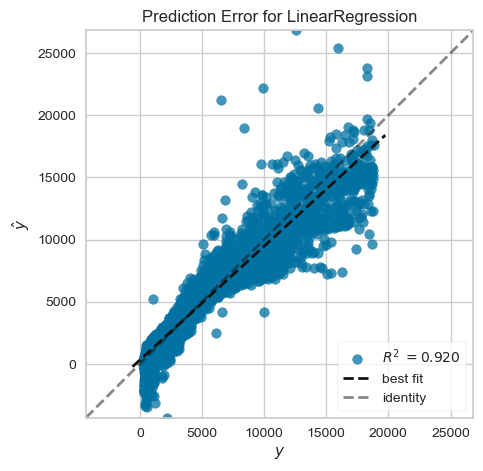

In [62]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
pipe_linear_model = Pipeline(steps=operations)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

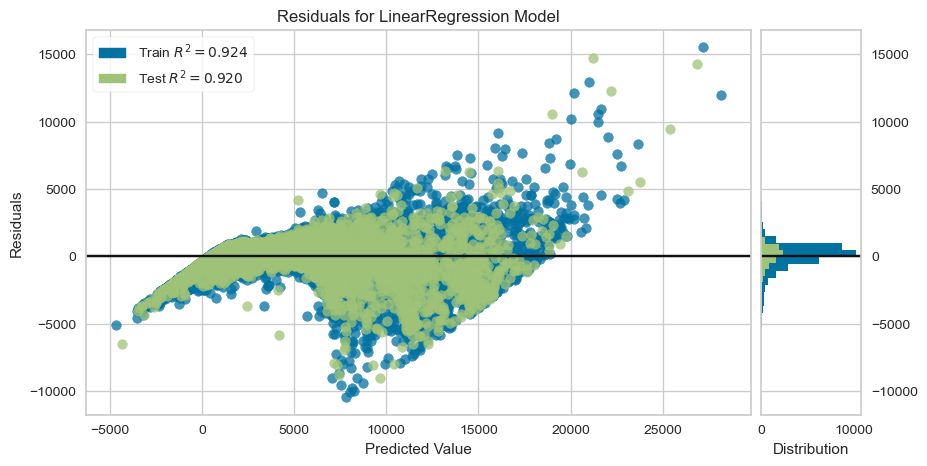

In [63]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = Pipeline(steps=operations)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

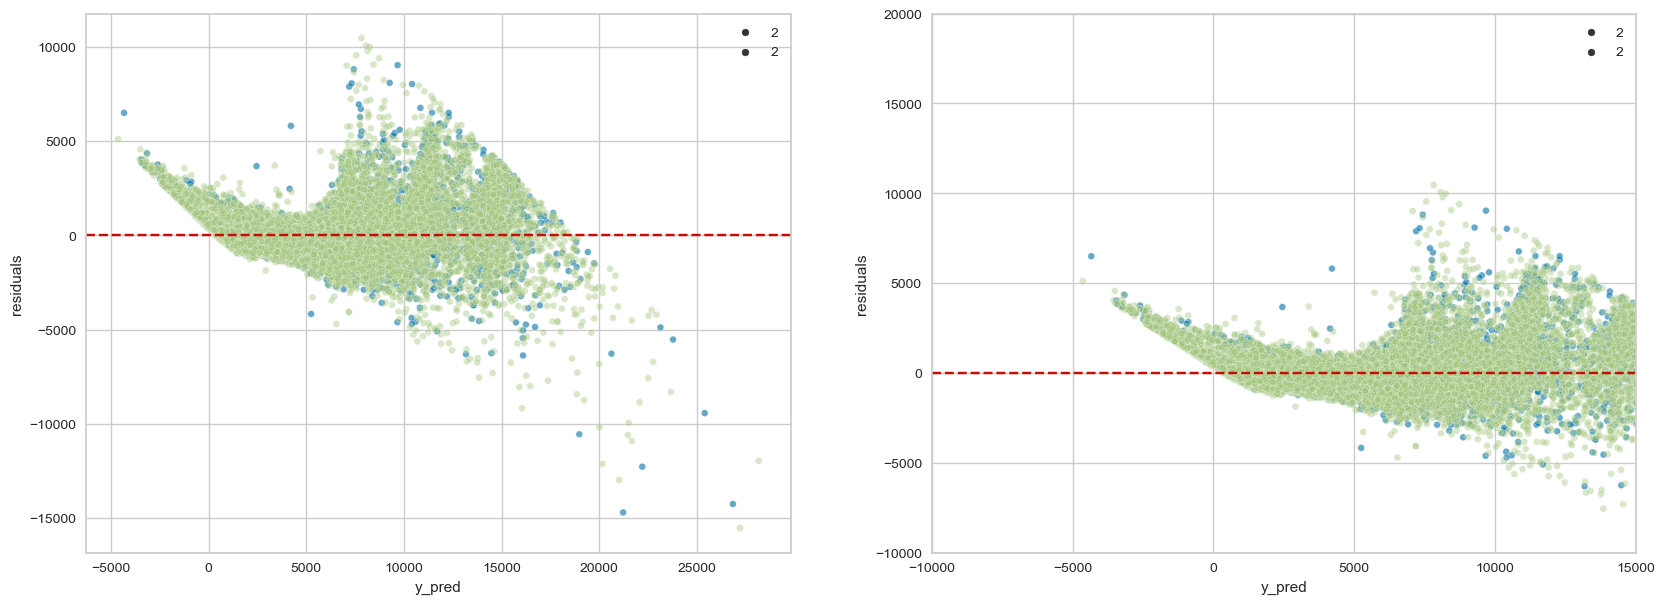

In [64]:
y_pred=pipe_linear_model.predict(X_test)
y_pred_train = pipe_linear_model.predict(X_train)

residual_test = y_test-y_pred
residual_train = y_train-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();


## Random Forest Model

In [65]:
operations = [
    ("OneHotEncoder", column_trans),
    ('scaler', scaler),
    ("rf",RandomForestRegressor())
]

pipe_rf_model = Pipeline(steps=operations)

pipe_rf_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['cut', 'color', 'clarity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

In [66]:
pred = pipe_rf_model.predict(X_test)

In [67]:
train_val(pipe_rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.997191,0.979535
mae,102.595780,284.929927
mse,44329.119855,329954.332183
rmse,210.544817,574.416515


In [79]:
operations = [
    ("OneHotEncoder", column_trans),
#     ('scaler', scaler),
    ("rf",RandomForestRegressor(n_estimators=600, max_features=20, random_state=101))
]

pipe_rf_model2 = Pipeline(steps=operations)

pipe_rf_model2.fit(X_train, y_train)

pred2 = pipe_rf_model.predict(X_test)


train_val(pipe_rf_model2, X_train, y_train, X_test, y_test)

,train,test
R2,0.997387,0.980376
mae,100.138937,280.111626
mse,41239.162474,316406.371140
rmse,203.074278,562.500108


## RF GridSearch

In [77]:

from sklearn.model_selection import train_test_split, GridSearchCV


pipeline = Pipeline(steps=operations)


# Define the parameter grid for grid search
param_grid = {
    "rf__n_estimators": [400, 500, 600],
    "rf__max_depth": [2, 3, 4, 5, 6],
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('rf', RandomForestRegressor())]),
             param_grid={'rf__max_depth': [2, 3, 4, 5, 6],
                         'rf__n_estimators': [400, 500, 600]},
             scoring='r2')

In [78]:
pred = grid_search.predict(X_test)

In [79]:
train_val(grid_search, X_train, y_train, X_test, y_test)

,train,test
R2,9.356179e-01,9.291809e-01
mae,5.477191e+02,5.741175e+02
mse,1.016067e+06,1.141826e+06
rmse,1.008002e+03,1.068563e+03


In [80]:
# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Evaluate the best model on the testing data
test_score = best_model.score(X_test, y_test)

# Print the best score and the test score
print("Best Score:", best_score)
print("Test Score:", test_score)

# Print the best parameters
print("Best Parameters:")
print(grid_search.best_params_)

Best Score: 0.9359013975819621
Test Score: 0.9291809465399499
Best Parameters:
{'rf__max_depth': 6, 'rf__n_estimators': 600}


In [80]:
ID= test_df['Id']
ID

0            1
1            2
2            3
3            4
4            5
         ...  
10783    10784
10784    10785
10785    10786
10786    10787
10787    10788
Name: Id, Length: 10788, dtype: int64

In [81]:
price=pipe_rf_model2.predict(test_df.drop('Id',axis=1))
data={'ID':ID,'price':price}
sub=pd.DataFrame(data)
sub.to_csv('sub.csv',index=False)